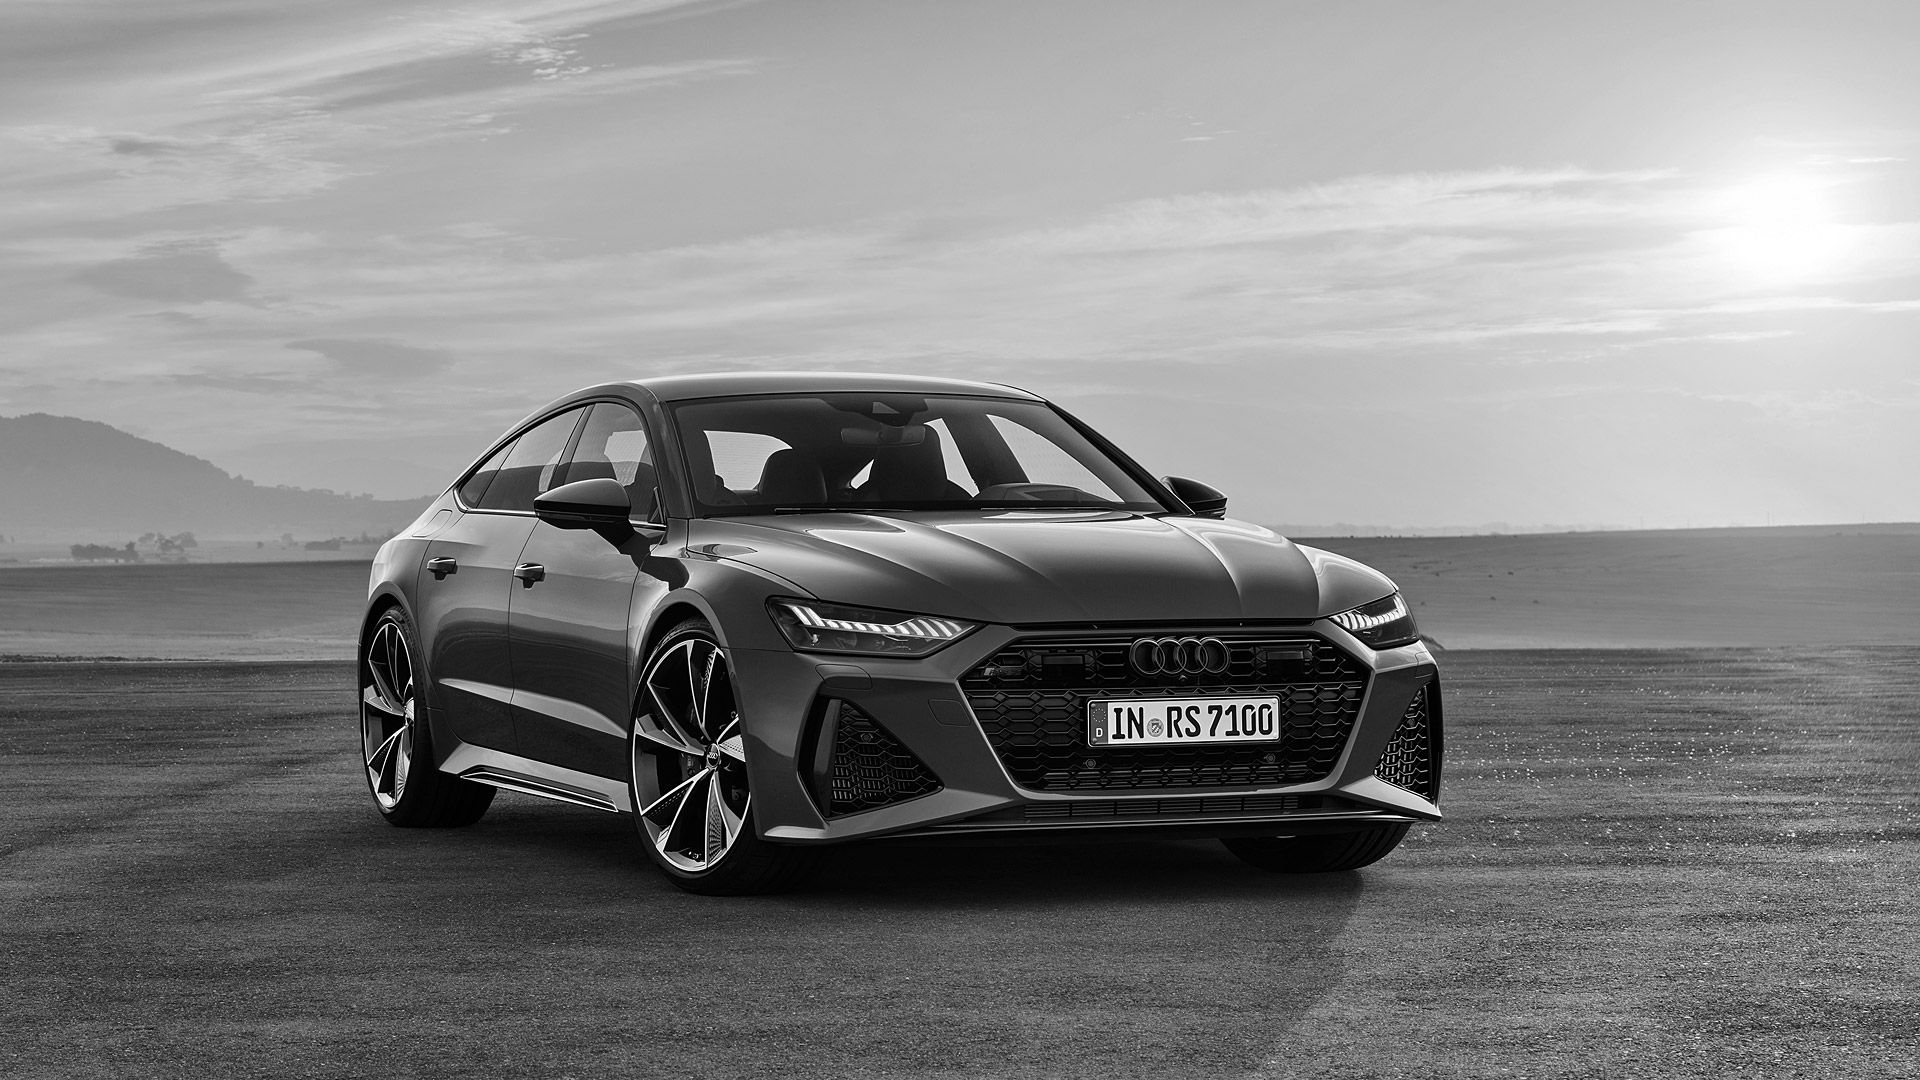

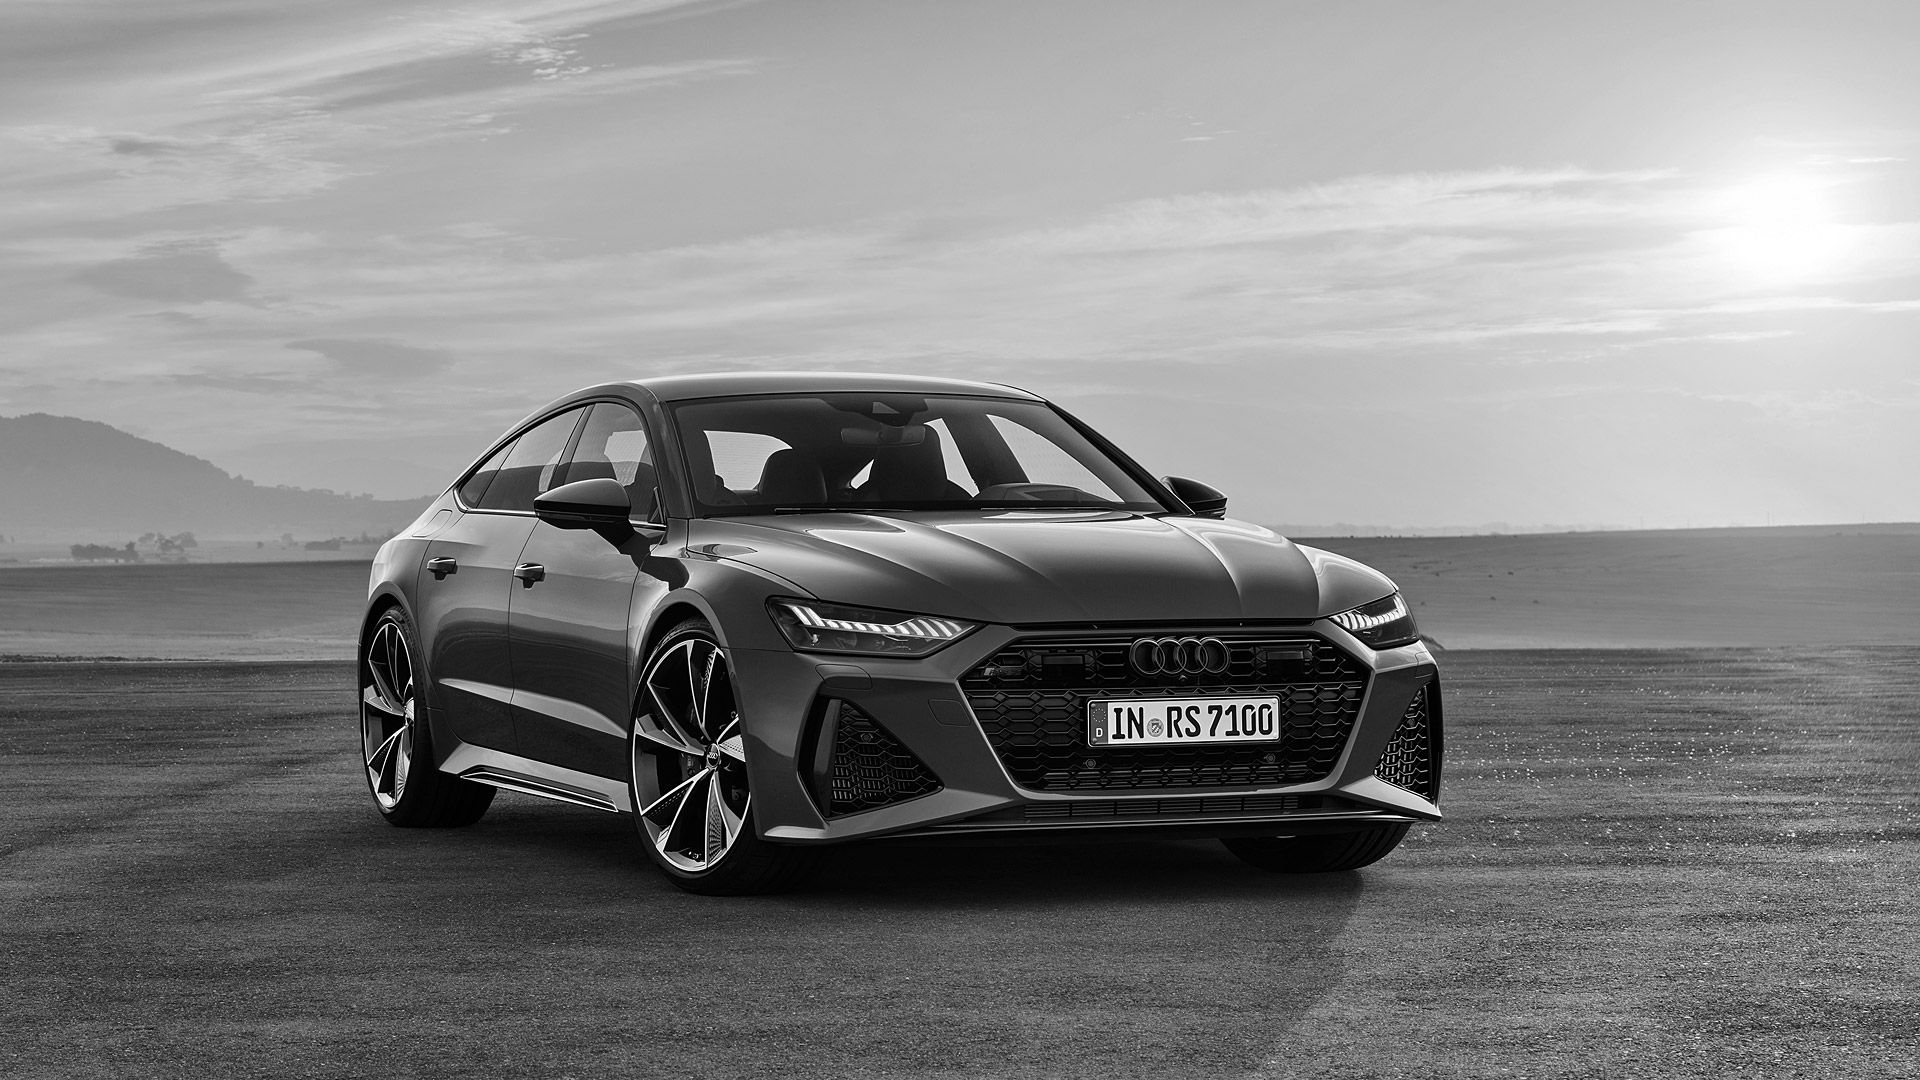

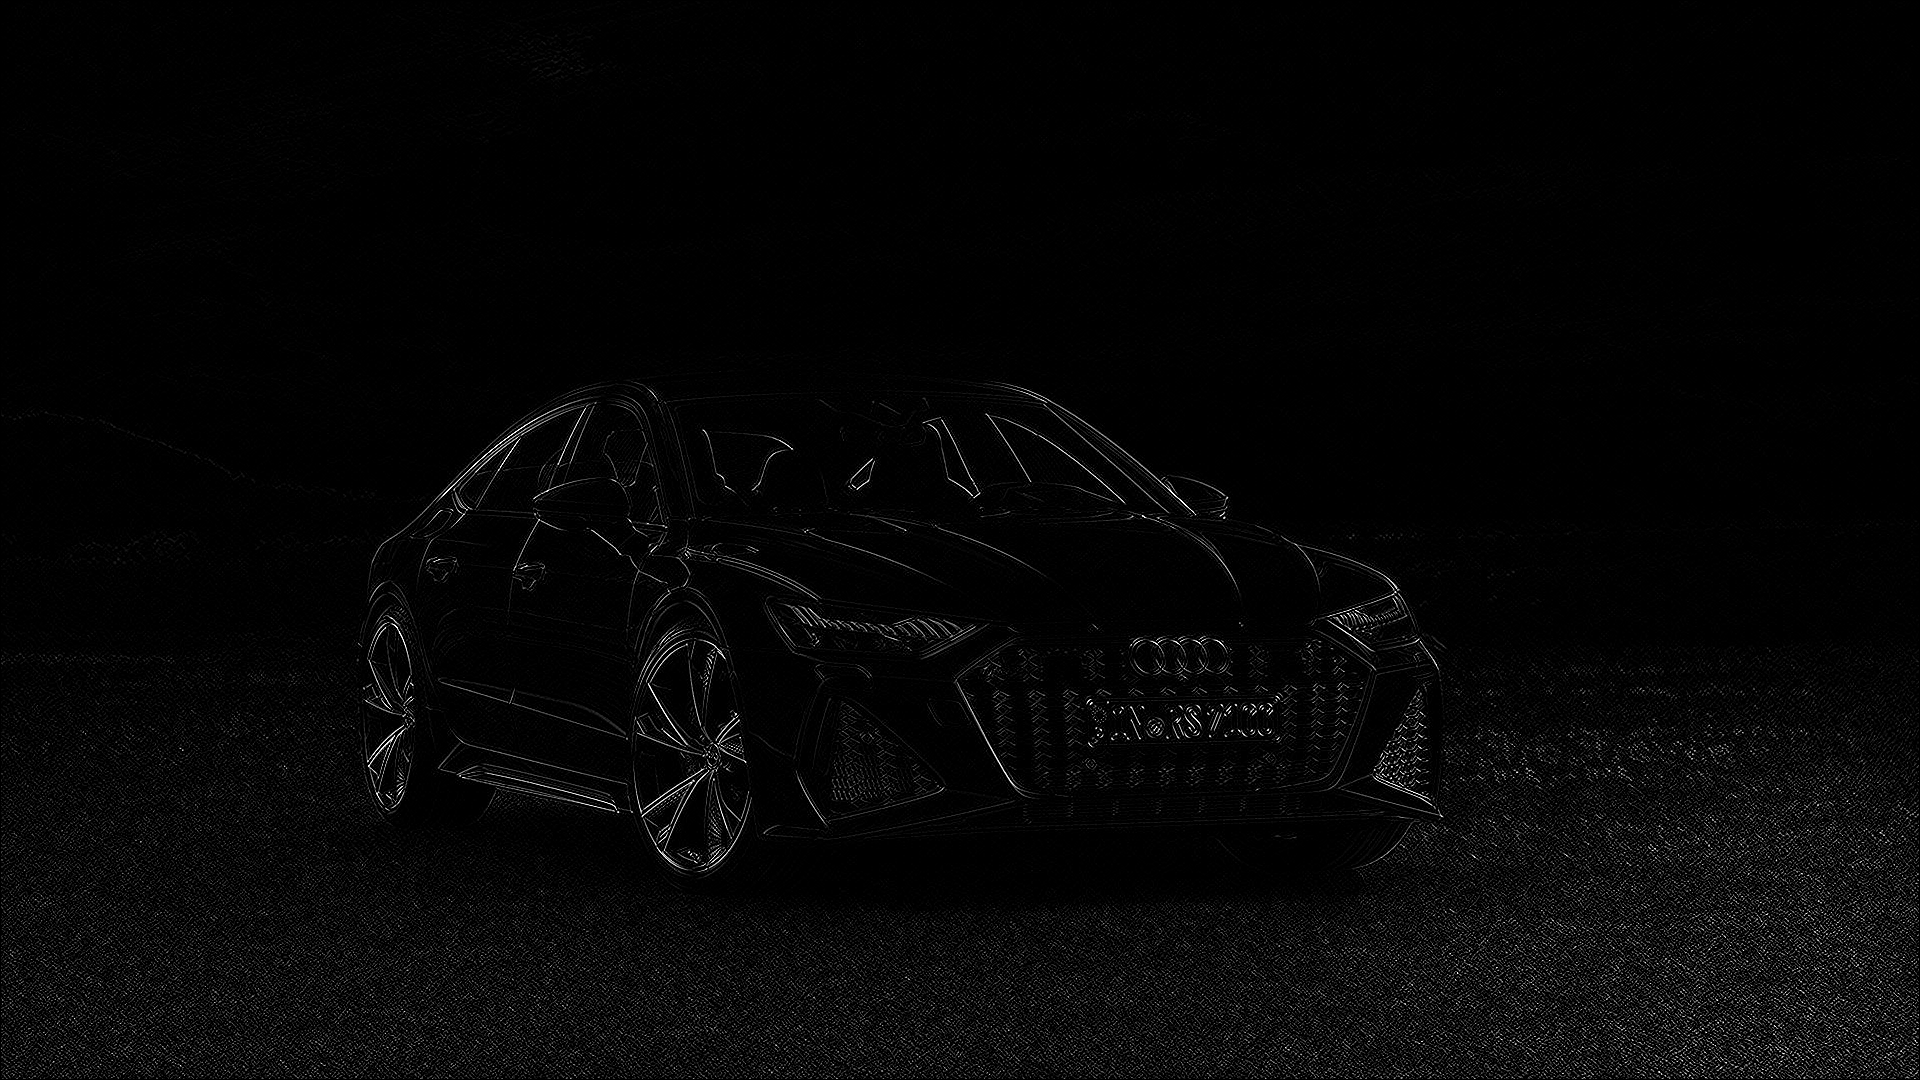

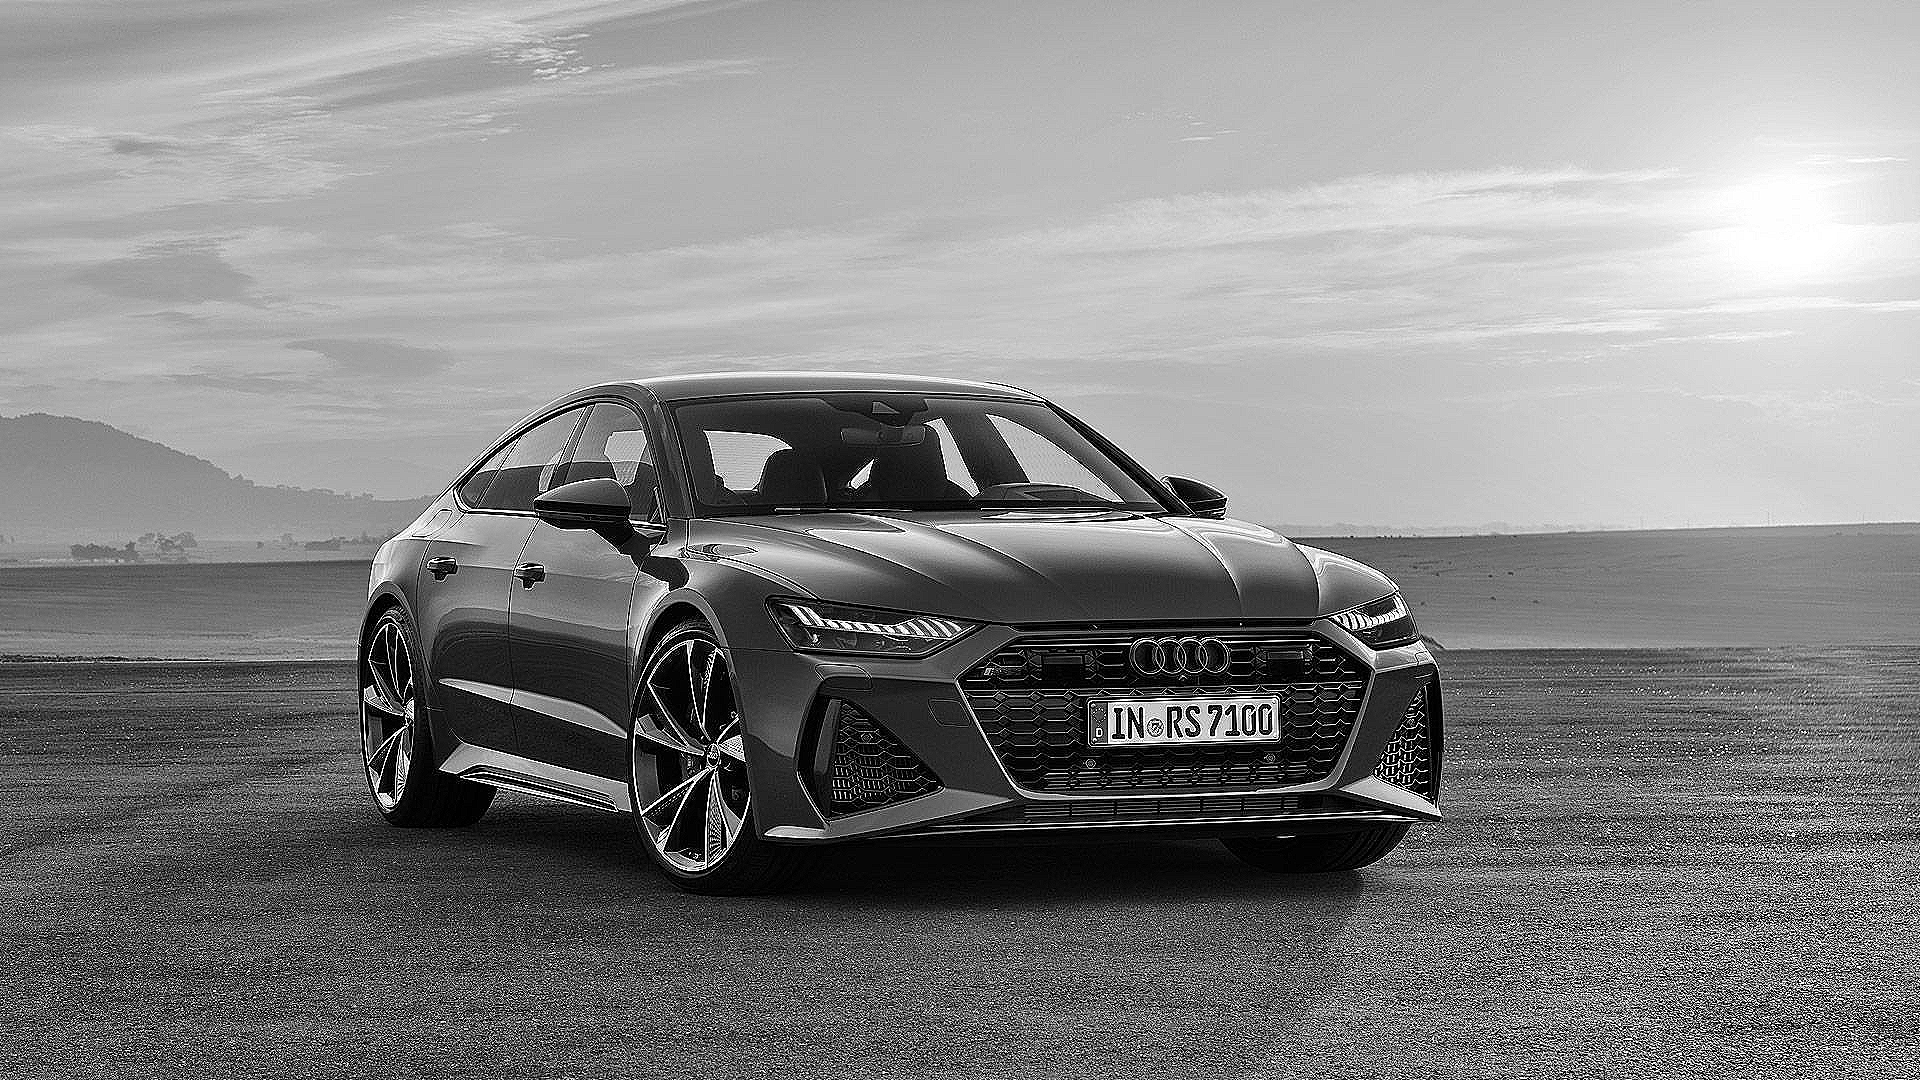

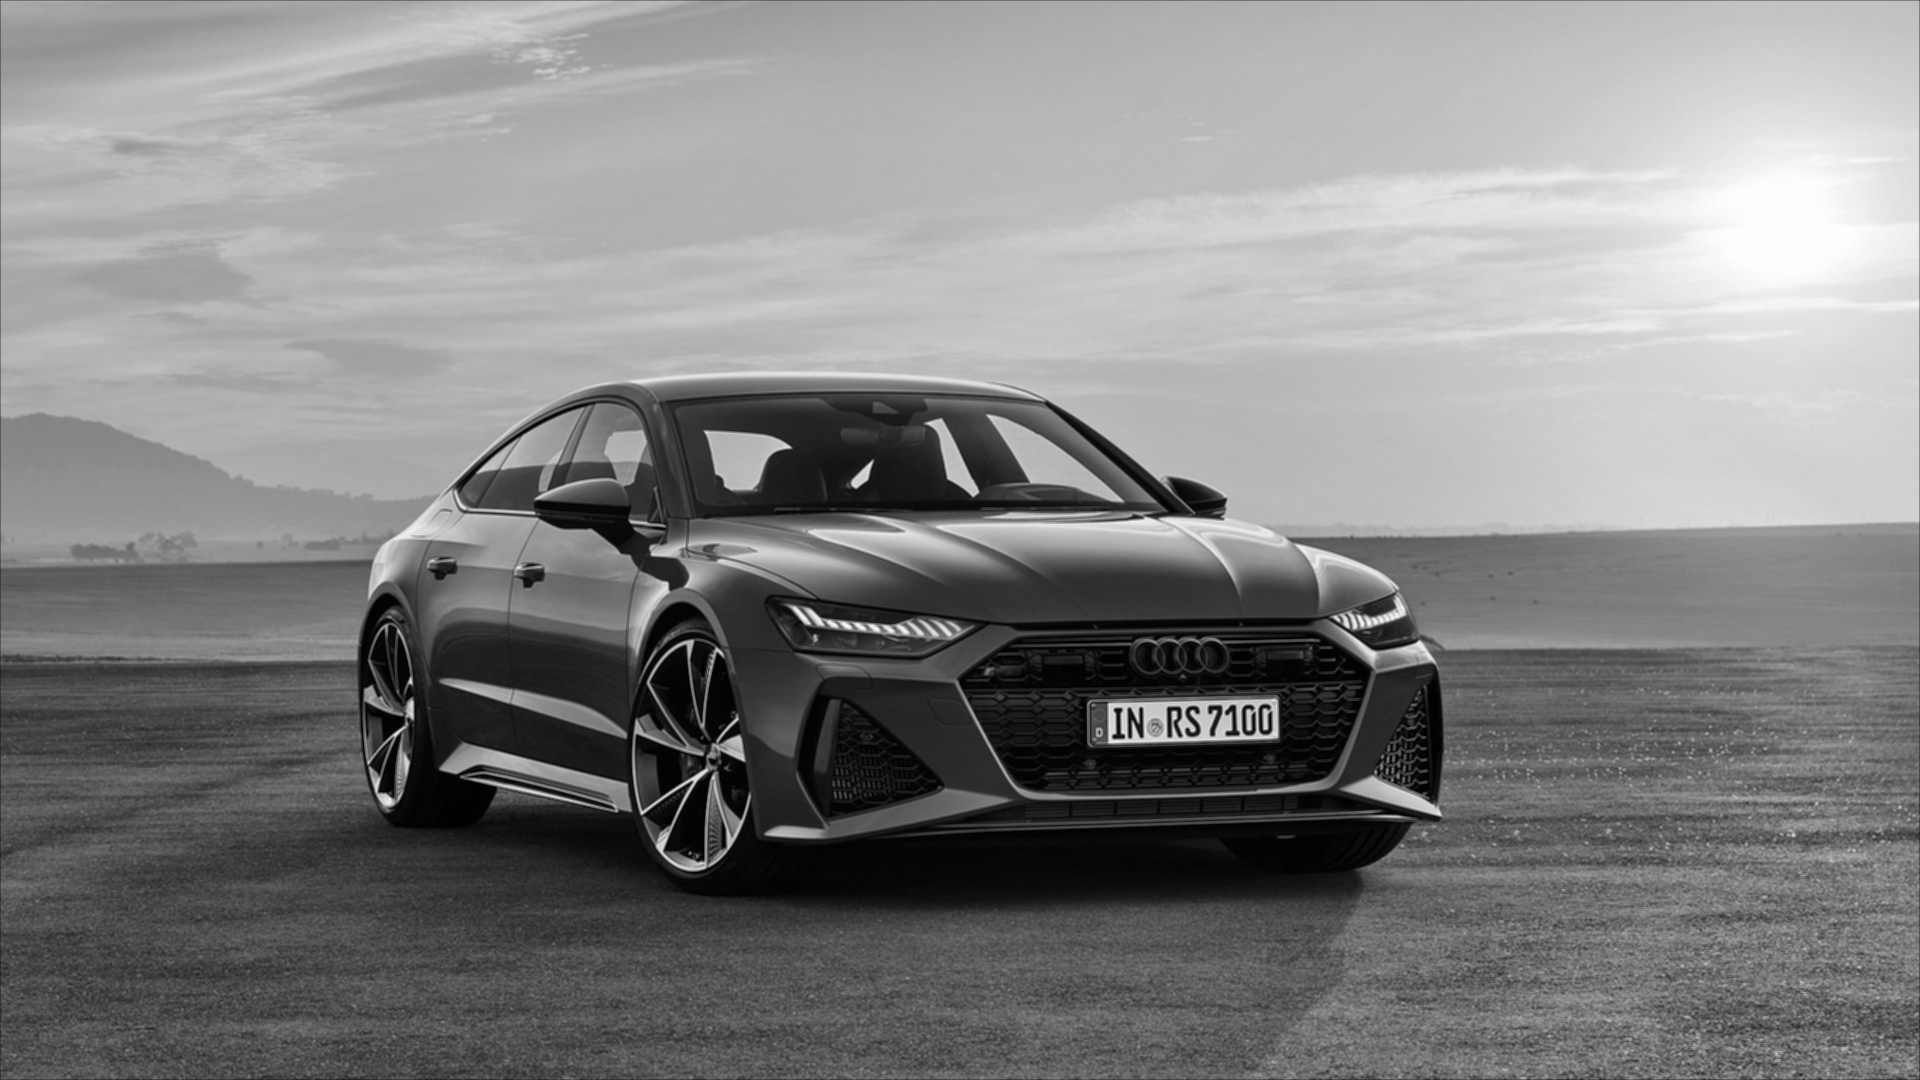

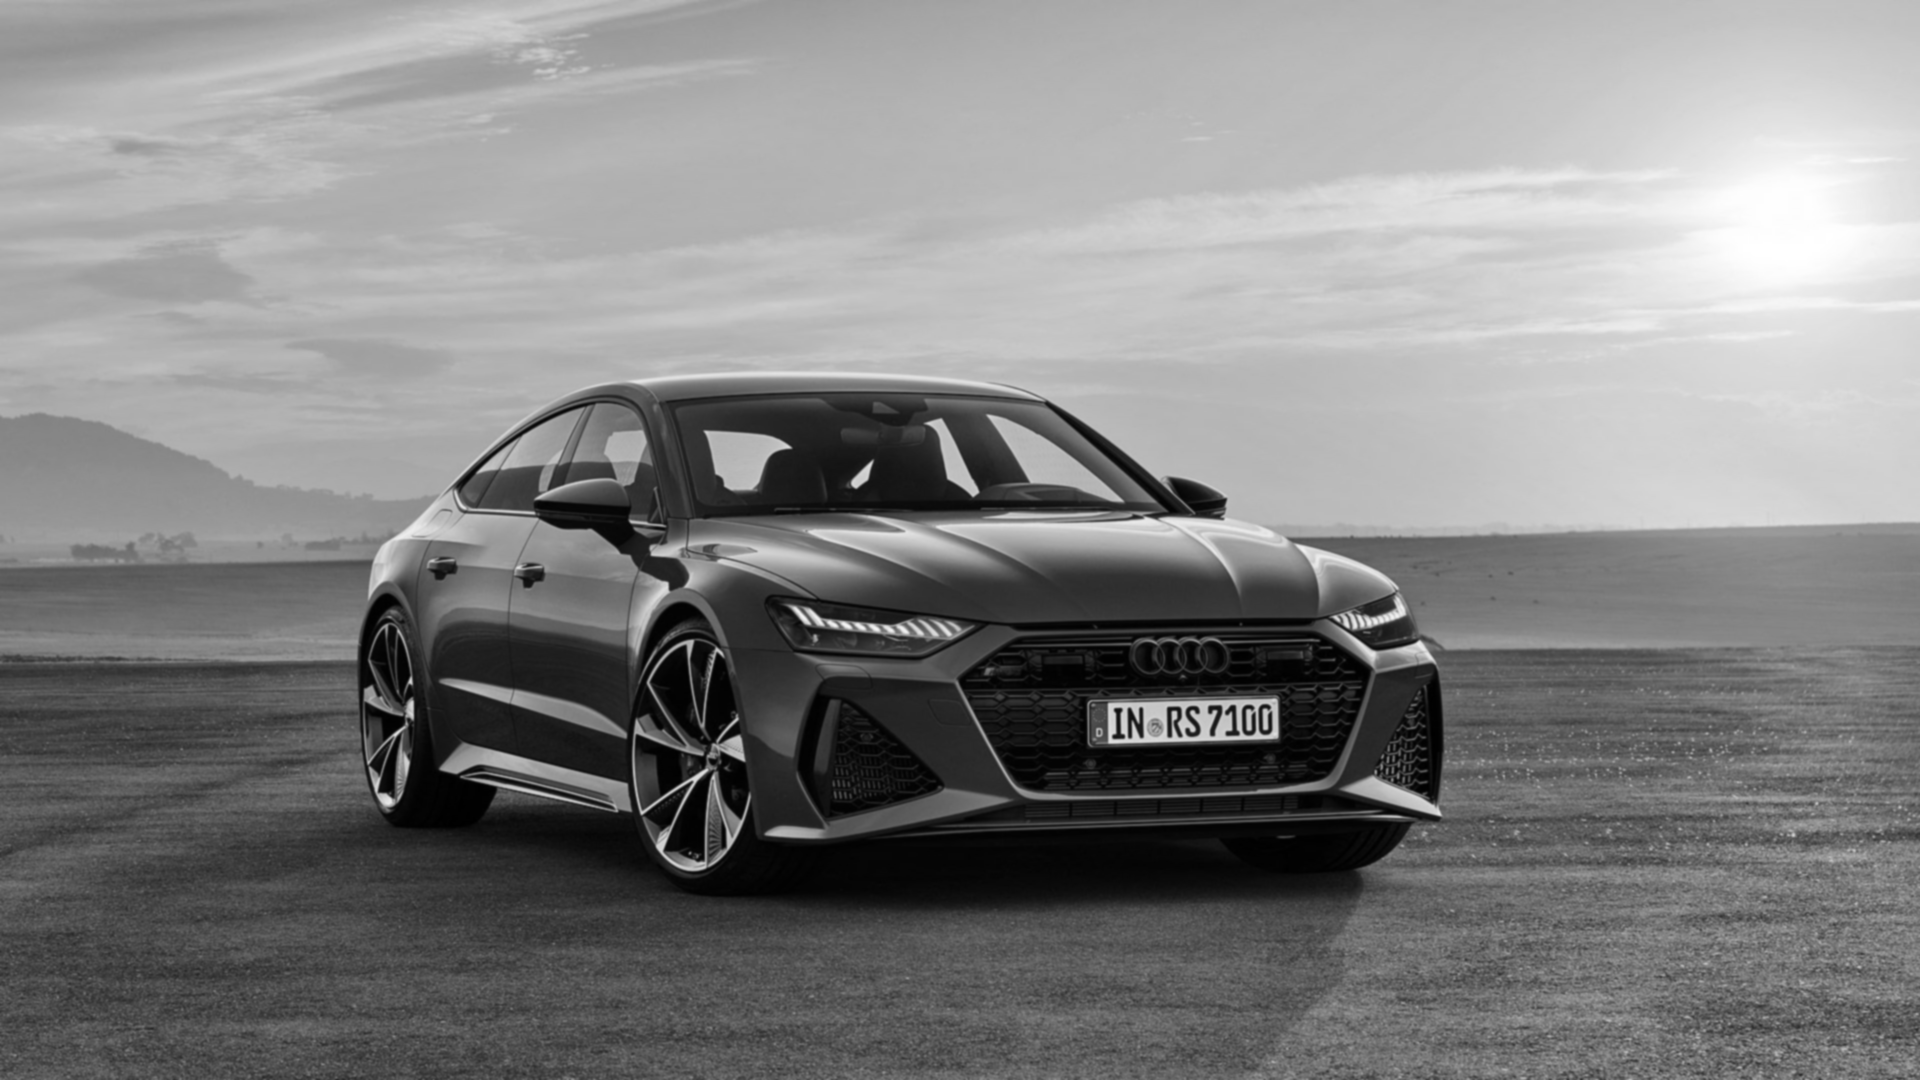

In [10]:
import cv2
import numpy as np
from scipy.signal import convolve2d
from scipy.ndimage import gaussian_filter
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread('audi_rs7.jpg', cv2.IMREAD_GRAYSCALE)

# Define kernels
identity_kernel = np.array([[0, 0, 0],
                            [0, 1, 0],
                            [0, 0, 0]])

edge_detection_kernel = np.array([[1, 0, -1],
                                   [0, 0, 0],
                                   [-1, 0, 1]])

sharpen_kernel = np.array([[0, -1, 0],
                            [-1, 5, -1],
                            [0, -1, 0]])

box_blur_kernel = np.ones((3, 3), dtype=np.float32) / 9

gaussian_kernel = np.array([[1, 2, 1],
                            [2, 4, 2],
                            [1, 2, 1]], dtype=np.float32) / 16

# Perform correlation operation using filter2D
identity_result = cv2.filter2D(image, -1, identity_kernel)
edge_detection_result = cv2.filter2D(image, -1, edge_detection_kernel)
sharpen_result = cv2.filter2D(image, -1, sharpen_kernel)

# Perform convolution operation using convolve2d
box_blur_result = convolve2d(image, box_blur_kernel, mode='same', boundary='fill', fillvalue=0)
gaussian_blur_result = gaussian_filter(image, sigma=1)

# Display the results
cv2_imshow(image)
cv2_imshow(identity_result)
cv2_imshow(edge_detection_result)
cv2_imshow(sharpen_result)
cv2_imshow((box_blur_result).astype(np.uint8))
cv2_imshow((gaussian_blur_result).astype(np.uint8))